In [2]:
import numpy as np# Importing every library we need

In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("data0.csv")

In [6]:
df.head()

,Market Place,Crop Variety,Producer Min,Producer Max,Wholesale Min,Wholesale Max,Retail Min,Retail Max,Volume,Collection Date
0,Bahir Dar kebele 04,White Teff (Quintal),0.0,0.0,2400,2500,2550.0,2650,Sufficient,5/2/2019
1,Halaba,White Teff (Quintal),2450.0,2500.0,2600,2700,2800.0,2900,Under,5/2/2019
2,Debre Markos Huseta Gebeya,White Teff (Quintal),2450.0,2500.0,0,0,2500.0,2550,Sufficient,5/4/2019
3,Bichena Gebeya,White Teff (Quintal),2450.0,2500.0,0,0,2500.0,2550,Sufficient,5/4/2019
4,Shindie Gebeya,White Teff (Quintal),2250.0,2300.0,0,0,2350.0,2400,Sufficient,5/4/2019


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23006 entries, 0 to 23005
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Market Place     23006 non-null  object 
 1   Crop Variety     23006 non-null  object 
 2   Producer Min     23006 non-null  float64
 3   Producer Max     23006 non-null  float64
 4   Wholesale Min    23006 non-null  int64  
 5   Wholesale Max    23006 non-null  int64  
 6   Retail Min       23006 non-null  float64
 7   Retail Max       23006 non-null  int64  
 8   Volume           23006 non-null  object 
 9   Collection Date  23006 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 1.8+ MB


In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Market Place       0
Crop Variety       0
Producer Min       0
Producer Max       0
Wholesale Min      0
Wholesale Max      0
Retail Min         0
Retail Max         0
Volume             0
Collection Date    0
dtype: int64

In [10]:
data2=df.copy()

In [11]:
data2 = data2.dropna()

In [12]:
data2.isnull().sum()

Market Place       0
Crop Variety       0
Producer Min       0
Producer Max       0
Wholesale Min      0
Wholesale Max      0
Retail Min         0
Retail Max         0
Volume             0
Collection Date    0
dtype: int64

In [13]:
data2 = data2.drop(columns='Retail Min')# multiple in one (['f','h])

In [14]:
data2 = data2.drop(columns='Wholesale Max')

In [15]:
data2 = data2.drop(columns='Wholesale Min')

In [16]:
data2 = data2.drop(columns='Producer Max')

In [17]:
data2 = data2.drop(columns='Producer Min')

In [18]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,Collection Date
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,5/2/2019
1,Halaba,White Teff (Quintal),2900,Under,5/2/2019
2,Debre Markos Huseta Gebeya,White Teff (Quintal),2550,Sufficient,5/4/2019
3,Bichena Gebeya,White Teff (Quintal),2550,Sufficient,5/4/2019
4,Shindie Gebeya,White Teff (Quintal),2400,Sufficient,5/4/2019


In [19]:
data2["Collection Date"][4]

'5/4/2019'

In [20]:
data2["Collection Date"].value_counts()

Collection Date
1/28/2023     81
2/4/2023      79
2/18/2023     75
1/14/2023     75
12/24/2022    72
              ..
9/11/2022      1
1/16/2022      1
10/4/2020      1
1/22/2023      1
8/9/2019       1
Name: count, Length: 1360, dtype: int64

In [21]:
str = data2["Collection Date"][1]#taking any arbitrary data spliting it by calling split methode
str2 = str.split()#spliting it to 5,/,1,/,2019   thus str[6] out of range 
print(str)
print(str2)
print(str[0])

5/2/2019
['5/2/2019']
5


In [22]:
#creating dictionary to store the months in
Dict = {1 :"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
print(Dict)

{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


In [23]:
Dict[3]

'March'

In [24]:
month = []#creating empty column

In [25]:
for rr in data2["Collection Date"]:
    str = rr
    str2 = str.split('/')
    month.append(Dict[int(str2[0])])#taking the first term, (month) from the splited

In [26]:
len(month)

23006

In [27]:
data2["month"] = month

In [28]:
data2["month"]

0          May
1          May
2          May
3          May
4          May
         ...  
23001    March
23002    March
23003    March
23004    March
23005    March
Name: month, Length: 23006, dtype: object

In [29]:
data2["month"].unique()

array(['May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'January', 'February', 'March', 'April'],
      dtype=object)

In [30]:
season =[]#creating empty column of season

In [31]:
for tt in data2["month"]:
    if tt== "December" or tt=="January" or tt=="February":
        season.append("Winter")
    elif tt=="March" or tt=="April" or tt== "May":
            season.append("Autumn")
    elif tt=="June" or tt=="July" or tt == "August":
            season.append("Summer")
    elif tt=="September" or tt=="October" or tt== "November":
            season.append("Spring")

In [32]:
len(season)

23006

In [33]:
data2["season"] = season

In [34]:
data2["season"]

0        Autumn
1        Autumn
2        Autumn
3        Autumn
4        Autumn
          ...  
23001    Autumn
23002    Autumn
23003    Autumn
23004    Autumn
23005    Autumn
Name: season, Length: 23006, dtype: object

In [35]:
import pandas as pd 
df = pd.Timestamp("5/3/2023")
print(df.dayofweek)# will give each day like 0 = monday, 1=tuesday....

2


In [36]:
day_of_week = []

In [37]:
for rr in data2["Collection Date"]:#finding out value of each date and craating day column
    str = rr
    df = pd.Timestamp(rr)
    day = df.dayofweek
    day_of_week.append(day)

In [38]:
len(day_of_week)

23006

In [39]:
data2["day"]=day_of_week # putting the created day column to the data

In [40]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,Collection Date,month,season,day
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,5/2/2019,May,Autumn,3
1,Halaba,White Teff (Quintal),2900,Under,5/2/2019,May,Autumn,3
2,Debre Markos Huseta Gebeya,White Teff (Quintal),2550,Sufficient,5/4/2019,May,Autumn,5
3,Bichena Gebeya,White Teff (Quintal),2550,Sufficient,5/4/2019,May,Autumn,5
4,Shindie Gebeya,White Teff (Quintal),2400,Sufficient,5/4/2019,May,Autumn,5


In [41]:
data1 = data2.copy()

In [42]:
data2 = data2.drop(columns='Collection Date') #delating the column collection date not necessary any more

In [43]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,May,Autumn,3
1,Halaba,White Teff (Quintal),2900,Under,May,Autumn,3
2,Debre Markos Huseta Gebeya,White Teff (Quintal),2550,Sufficient,May,Autumn,5
3,Bichena Gebeya,White Teff (Quintal),2550,Sufficient,May,Autumn,5
4,Shindie Gebeya,White Teff (Quintal),2400,Sufficient,May,Autumn,5


<Axes: >

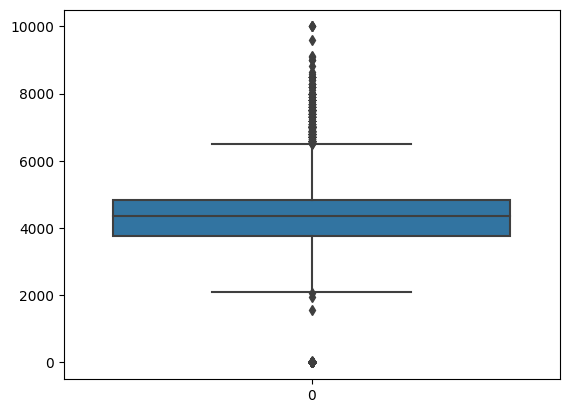

In [44]:
import seaborn as sns
sns.boxplot(data2['Retail Max'])# look if there are out layers and remove them

# Removing out layers of Retail Max price 25%<values<75% out of this range

In [45]:
#IQR
Q1=np.percentile(data2['Retail Max'], 25,interpolation="midpoint")
Q3=np.percentile(data2['Retail Max'], 75,interpolation="midpoint")
IQR=Q3-Q1

C:\Users\user\AppData\Local\Temp\ipykernel_5032\2964940248.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data2['Retail Max'], 25,interpolation="midpoint")
C:\Users\user\AppData\Local\Temp\ipykernel_5032\2964940248.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.percentile(data2['Retail Max'], 75,interpolation="midpoint")


In [46]:
#Upper bound
upper=np.where(data2['Retail Max']>=(Q3+1.5*IQR))
#Lower bound
lower=np.where(data2['Retail Max']<=(Q1-1.5*IQR))


In [47]:
print(upper[0],lower[0])

[11573 12239 19247 19371 19500 19611 19733 19752 19852 19865 19958 19969
 20063 20074 20174 20187 20320 20416 20561 20574 20576 20742 20749 20756
 20765 20974 20981 20983 20997 21078 21090 21107 21109 21117 21131 21143
 21281 21306 21315 21330 21390 21446 21462 21468 21505 21512 21530 21547
 21613 21630 21642 21644 21652 21666 21676 21677 21700 21721 21722 21726
 21728 21758 21773 21836 21842 21843 21865 21874 21881 21893 21903 21915
 21924 21975 21991 21995 22000 22009 22024 22026 22031 22033 22040 22041
 22056 22063 22068 22069 22071 22072 22080 22094 22095 22103 22109 22128
 22133 22137 22142 22144 22152 22153 22154 22175 22180 22182 22184 22193
 22194 22195 22196 22198 22203 22209 22210 22212 22213 22216 22219 22220
 22228 22232 22236 22241 22242 22243 22244 22245 22249 22257 22262 22266
 22269 22272 22273 22275 22289 22299 22303 22306 22309 22311 22312 22313
 22317 22318 22324 22326 22329 22333 22336 22339 22340 22341 22342 22345
 22350 22351 22352 22355 22357 22358 22362 22363 22

In [48]:
#...Removing the outliers...
data2.drop(upper[0], inplace=True)
data2.drop(lower[0], inplace=True)

print("New Shape: ", data2.shape)

New Shape:  (21431, 7)


<Axes: >

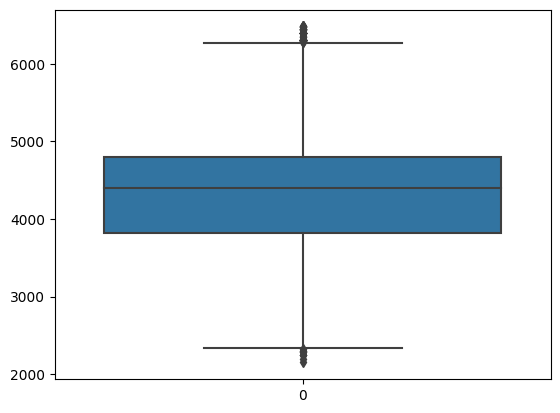

In [49]:
sns.boxplot(data2['Retail Max'])

# Graphical Analysis

<IPython.core.display.Javascript object>

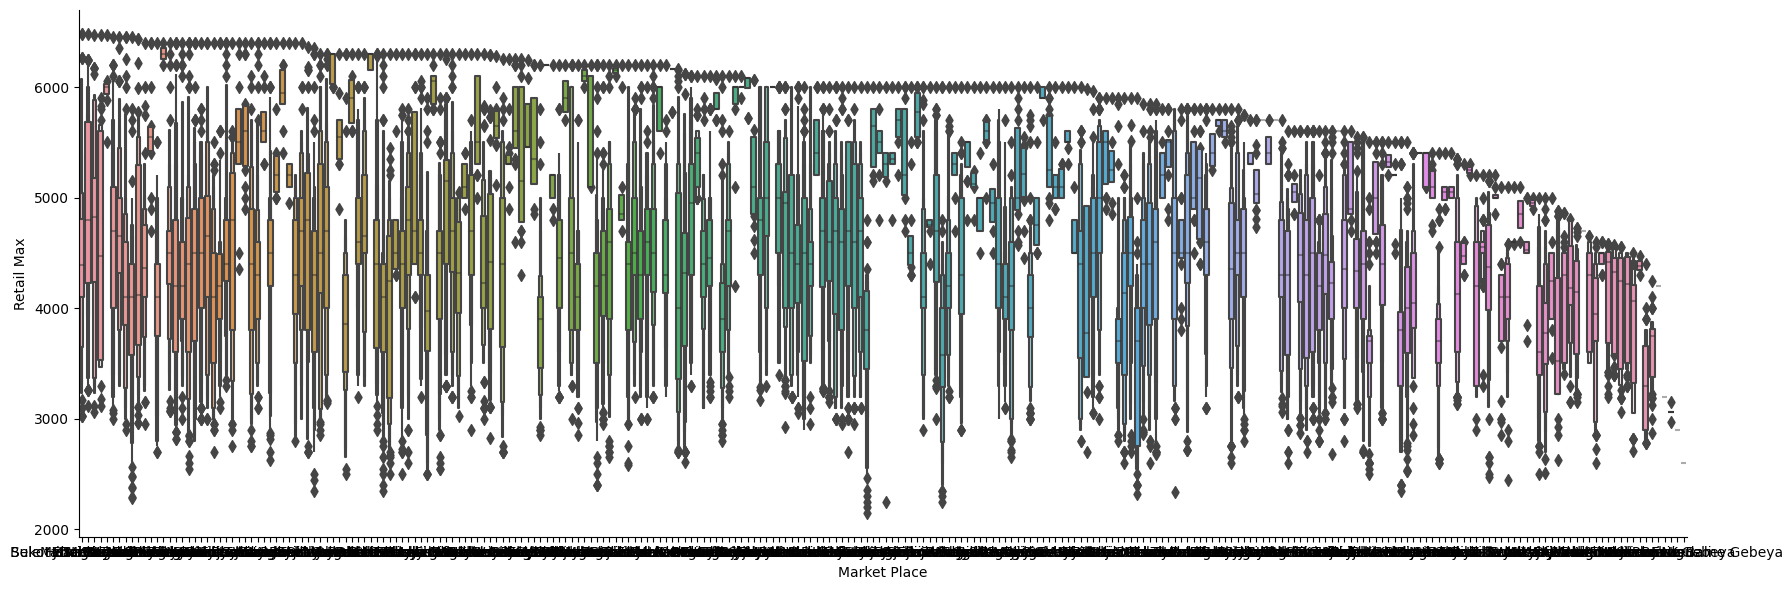

In [50]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "Market Place", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

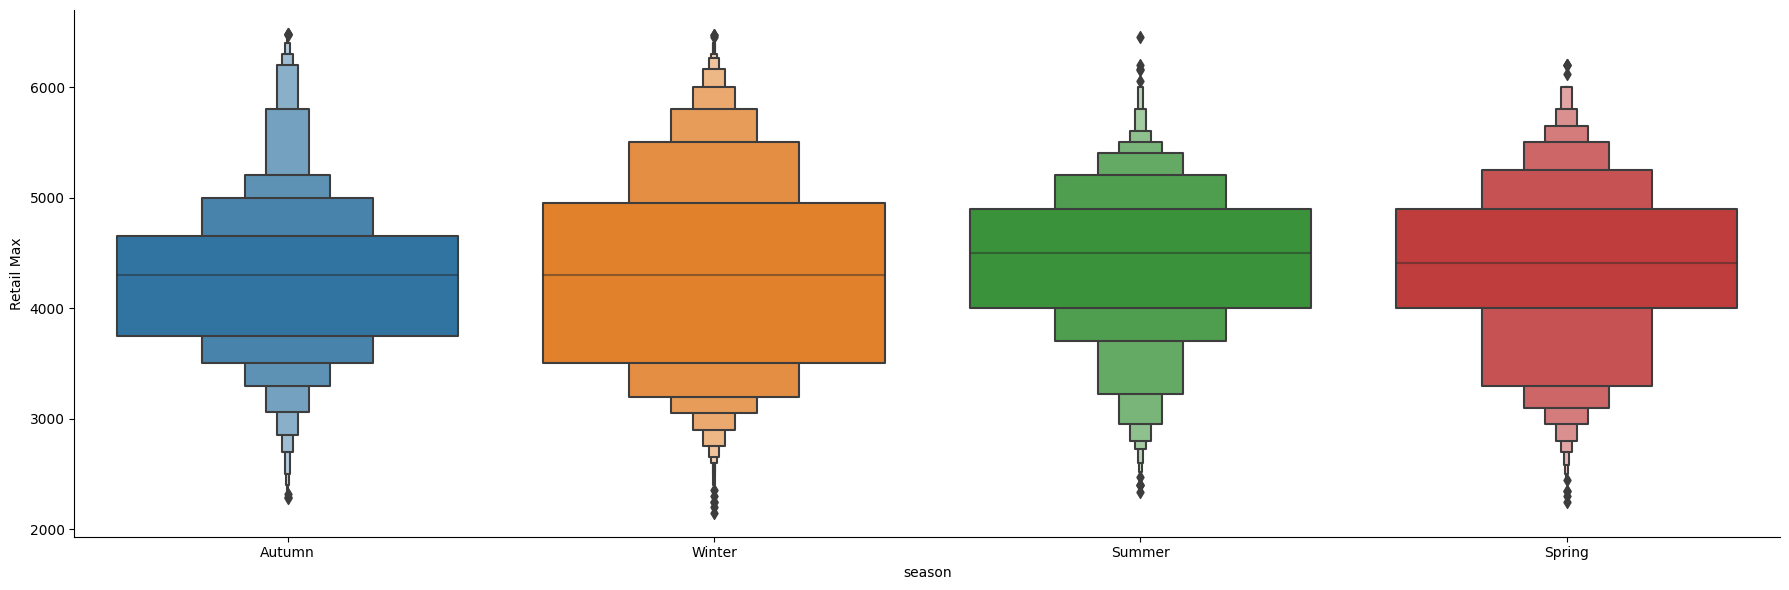

In [51]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "season", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

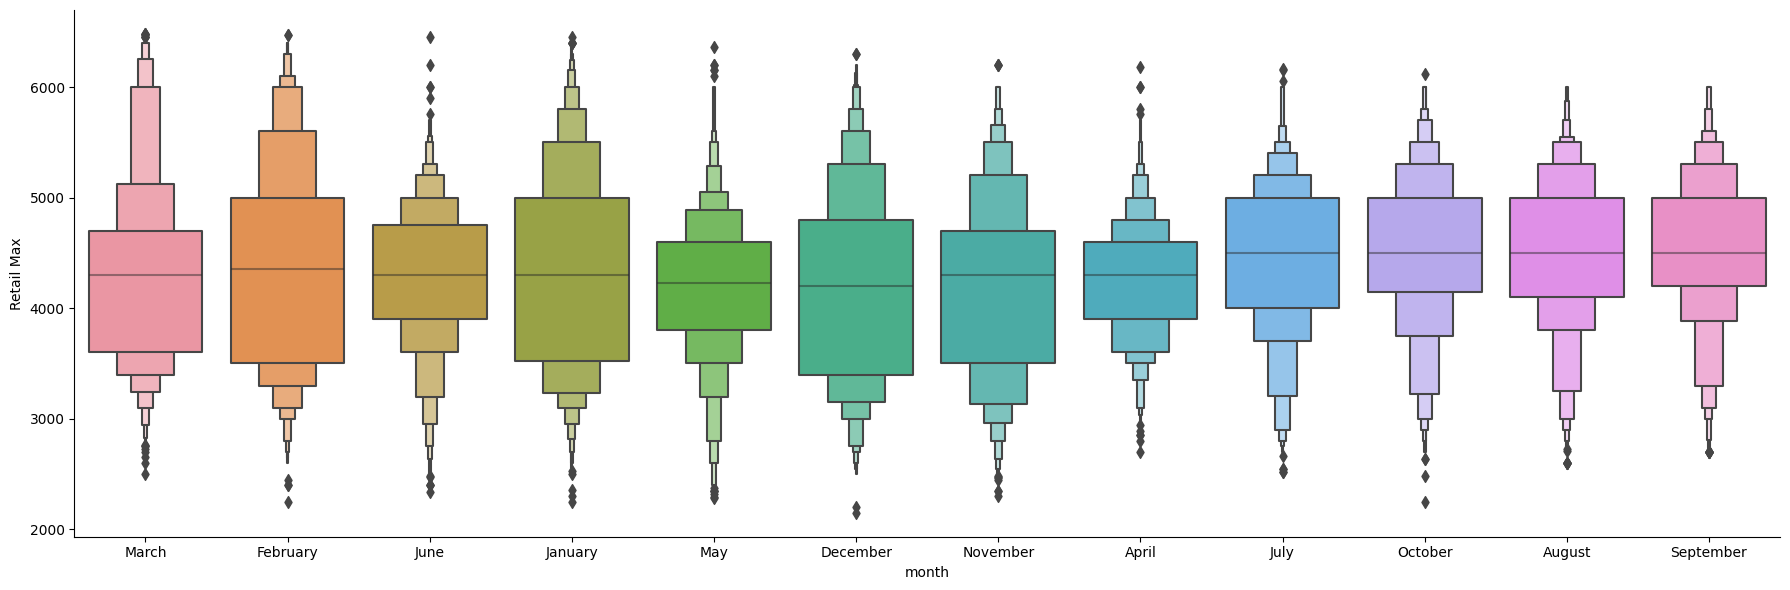

In [52]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "month", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

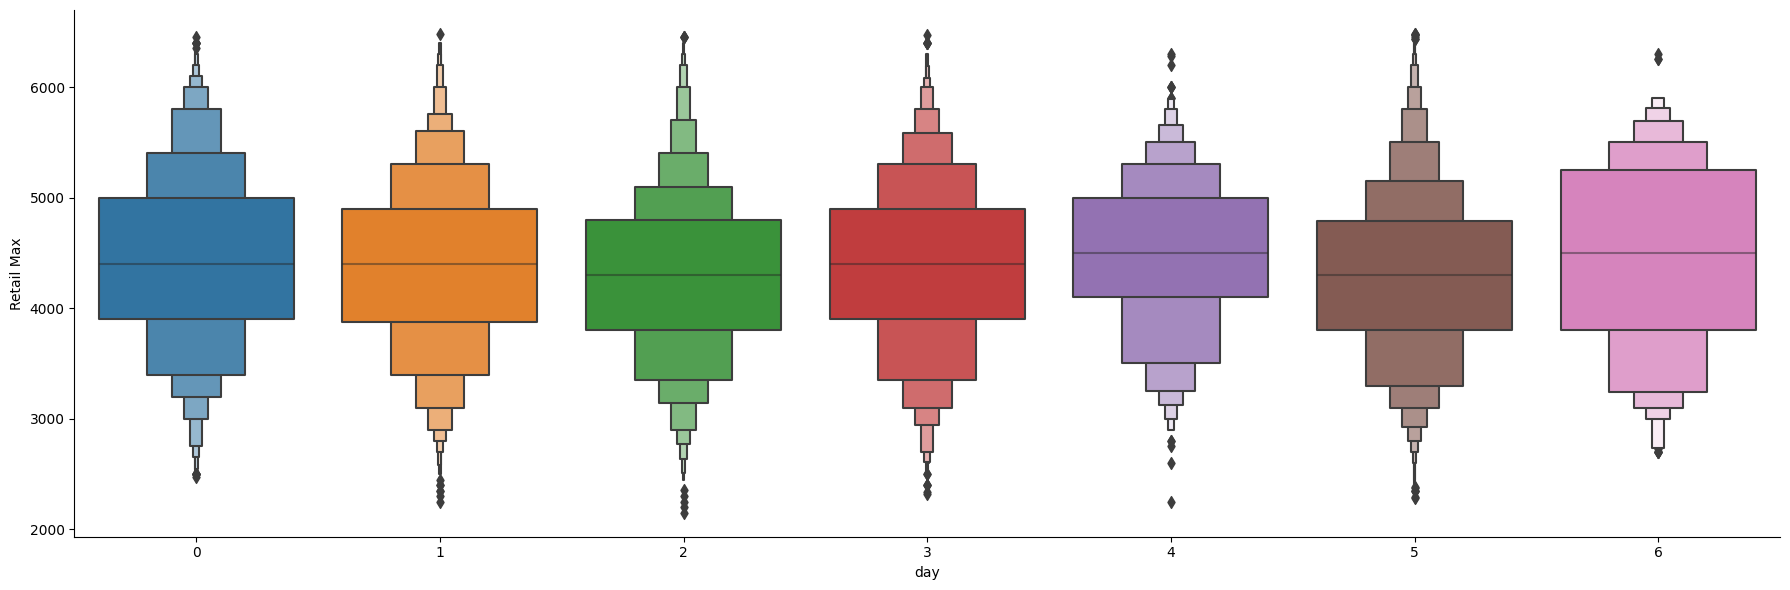

In [53]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "day", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

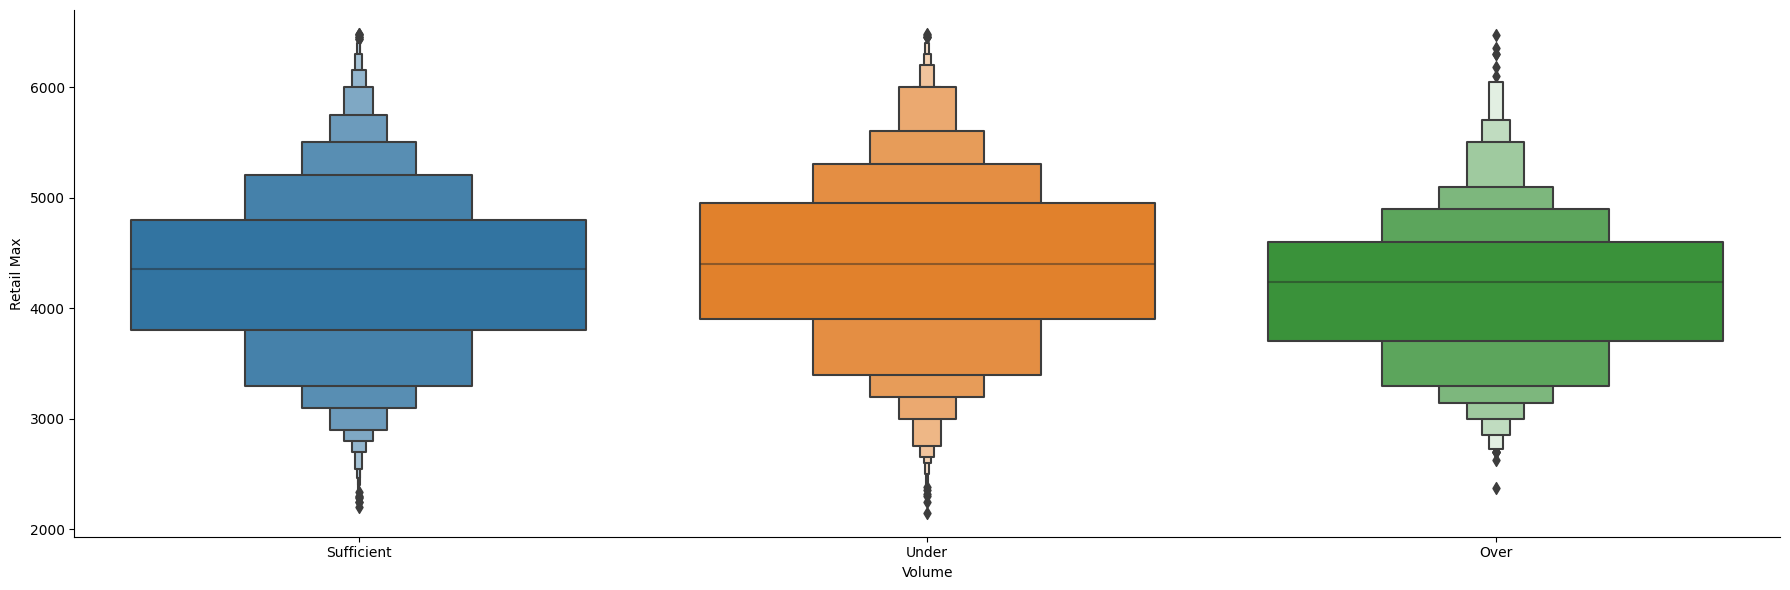

In [54]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "Volume", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [55]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,May,Autumn,3
1,Halaba,White Teff (Quintal),2900,Under,May,Autumn,3
2,Debre Markos Huseta Gebeya,White Teff (Quintal),2550,Sufficient,May,Autumn,5
3,Bichena Gebeya,White Teff (Quintal),2550,Sufficient,May,Autumn,5
4,Shindie Gebeya,White Teff (Quintal),2400,Sufficient,May,Autumn,5


In [56]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21431 entries, 0 to 23000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Market Place  21431 non-null  object
 1   Crop Variety  21431 non-null  object
 2   Retail Max    21431 non-null  int64 
 3   Volume        21431 non-null  object
 4   month         21431 non-null  object
 5   season        21431 non-null  object
 6   day           21431 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.8+ MB


# Changing the object data types in to numeric values using oneHotEncoding technique

In [57]:
# As market place is Nominal Categorical data we will perform OneHotEncoding

Market_Place = data2[["Market Place"]]

Market_Place = pd.get_dummies(Market_Place, drop_first= True)

Market_Place.head()

,Market Place_Adama City,Market Place_Addis Alem Ejere,Market Place_Addis Zemen,Market Place_Adet Gebeya,Market Place_Adi-Remets,Market Place_Adigrat,Market Place_Adulala,Market Place_Agaro,Market Place_Akeseta,Market Place_Aksum,...,Market Place_Yanfa,Market Place_Yaye,Market Place_Yejube,Market Place_Yirba,Market Place_Zemereo,Market Place_bote,Market Place_kelaji,Market Place_koka,Market Place_kombolcha kebele 03 Gebeya,Market Place_selka
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
# As crop variety is Nominal Categorical data we will perform OneHotEncoding

Crop_Variety = data2[["Crop Variety"]]

Crop_Variety = pd.get_dummies(Crop_Variety, drop_first= True)

Crop_Variety.head()

""
0
1
2
3
4


In [59]:
# As volume is Nominal Categorical data we will perform OneHotEncoding

Volume = data2[["Volume"]]

Volume = pd.get_dummies(Volume, drop_first= True)

Volume.head()

,Volume_Sufficient,Volume_Under
0,True,False
1,False,True
2,True,False
3,True,False
4,True,False


In [60]:
# As season is Nominal Categorical data we will perform OneHotEncoding

season = data2[["season"]]

season = pd.get_dummies(season, drop_first= True)

season.head(10)# the rest for the upsent == autumn

,season_Spring,season_Summer,season_Winter
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False
10,False,False,False


In [61]:
# As month is Nominal Categorical data we will perform OneHotEncoding

month = data2[["month"]]

month = pd.get_dummies(month, drop_first= True)

month.head()# 

,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False


In [62]:
data0 = data2.copy()

#concatenation of the columns to the data

In [63]:
data = pd.concat([data2, Market_Place, Crop_Variety, Volume, season, month ], axis = 1)

In [64]:
data.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day,Market Place_Adama City,Market Place_Addis Alem Ejere,Market Place_Addis Zemen,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,May,Autumn,3,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,Halaba,White Teff (Quintal),2900,Under,May,Autumn,3,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,Debre Markos Huseta Gebeya,White Teff (Quintal),2550,Sufficient,May,Autumn,5,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,Bichena Gebeya,White Teff (Quintal),2550,Sufficient,May,Autumn,5,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,Shindie Gebeya,White Teff (Quintal),2400,Sufficient,May,Autumn,5,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [65]:
datas = data.copy()

# delating the oneHotEncoded columns

In [66]:
data.drop(["Market Place", "Crop Variety", "Volume", "season", "month"], axis = 1, inplace = True)

In [67]:
data.head()

,Retail Max,day,Market Place_Adama City,Market Place_Addis Alem Ejere,Market Place_Addis Zemen,Market Place_Adet Gebeya,Market Place_Adi-Remets,Market Place_Adigrat,Market Place_Adulala,Market Place_Agaro,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,2650,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2900,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2550,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2550,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2400,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# splitting the data in  to train and test data 

In [68]:
data.columns

Index(['Retail Max', 'day', 'Market Place_Adama City',
       'Market Place_Addis Alem Ejere', 'Market Place_Addis Zemen',
       'Market Place_Adet Gebeya ', 'Market Place_Adi-Remets',
       'Market Place_Adigrat', 'Market Place_Adulala', 'Market Place_Agaro',
       ...
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September'],
      dtype='object', length=273)

In [69]:
features = data.loc[:,['day', 'Market Place_Bahir Dar kebele 04',
       'Market Place_Bonga', 'Market Place_Dilla', 'Market Place_Hawassa ',
       'Market Place_Shire-Endaselassie', 'Market Place_Sululta',
       'Market Place_Woldia Gebeya', 'Volume_Sufficient', 'Volume_Under',
       'season_Spring', 'season_Summer', 'season_Winter', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September']]

In [70]:
features.head()

,day,Market Place_Bahir Dar kebele 04,Market Place_Bonga,Market Place_Dilla,Market Place_Hawassa,Market Place_Shire-Endaselassie,Market Place_Sululta,Market Place_Woldia Gebeya,Volume_Sufficient,Volume_Under,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,3,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,3,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,5,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,5,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,5,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [71]:
labels = data.loc[:,'Retail Max']

In [72]:
labels.head()

0    2650
1    2900
2    2550
3    2550
4    2400
Name: Retail Max, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

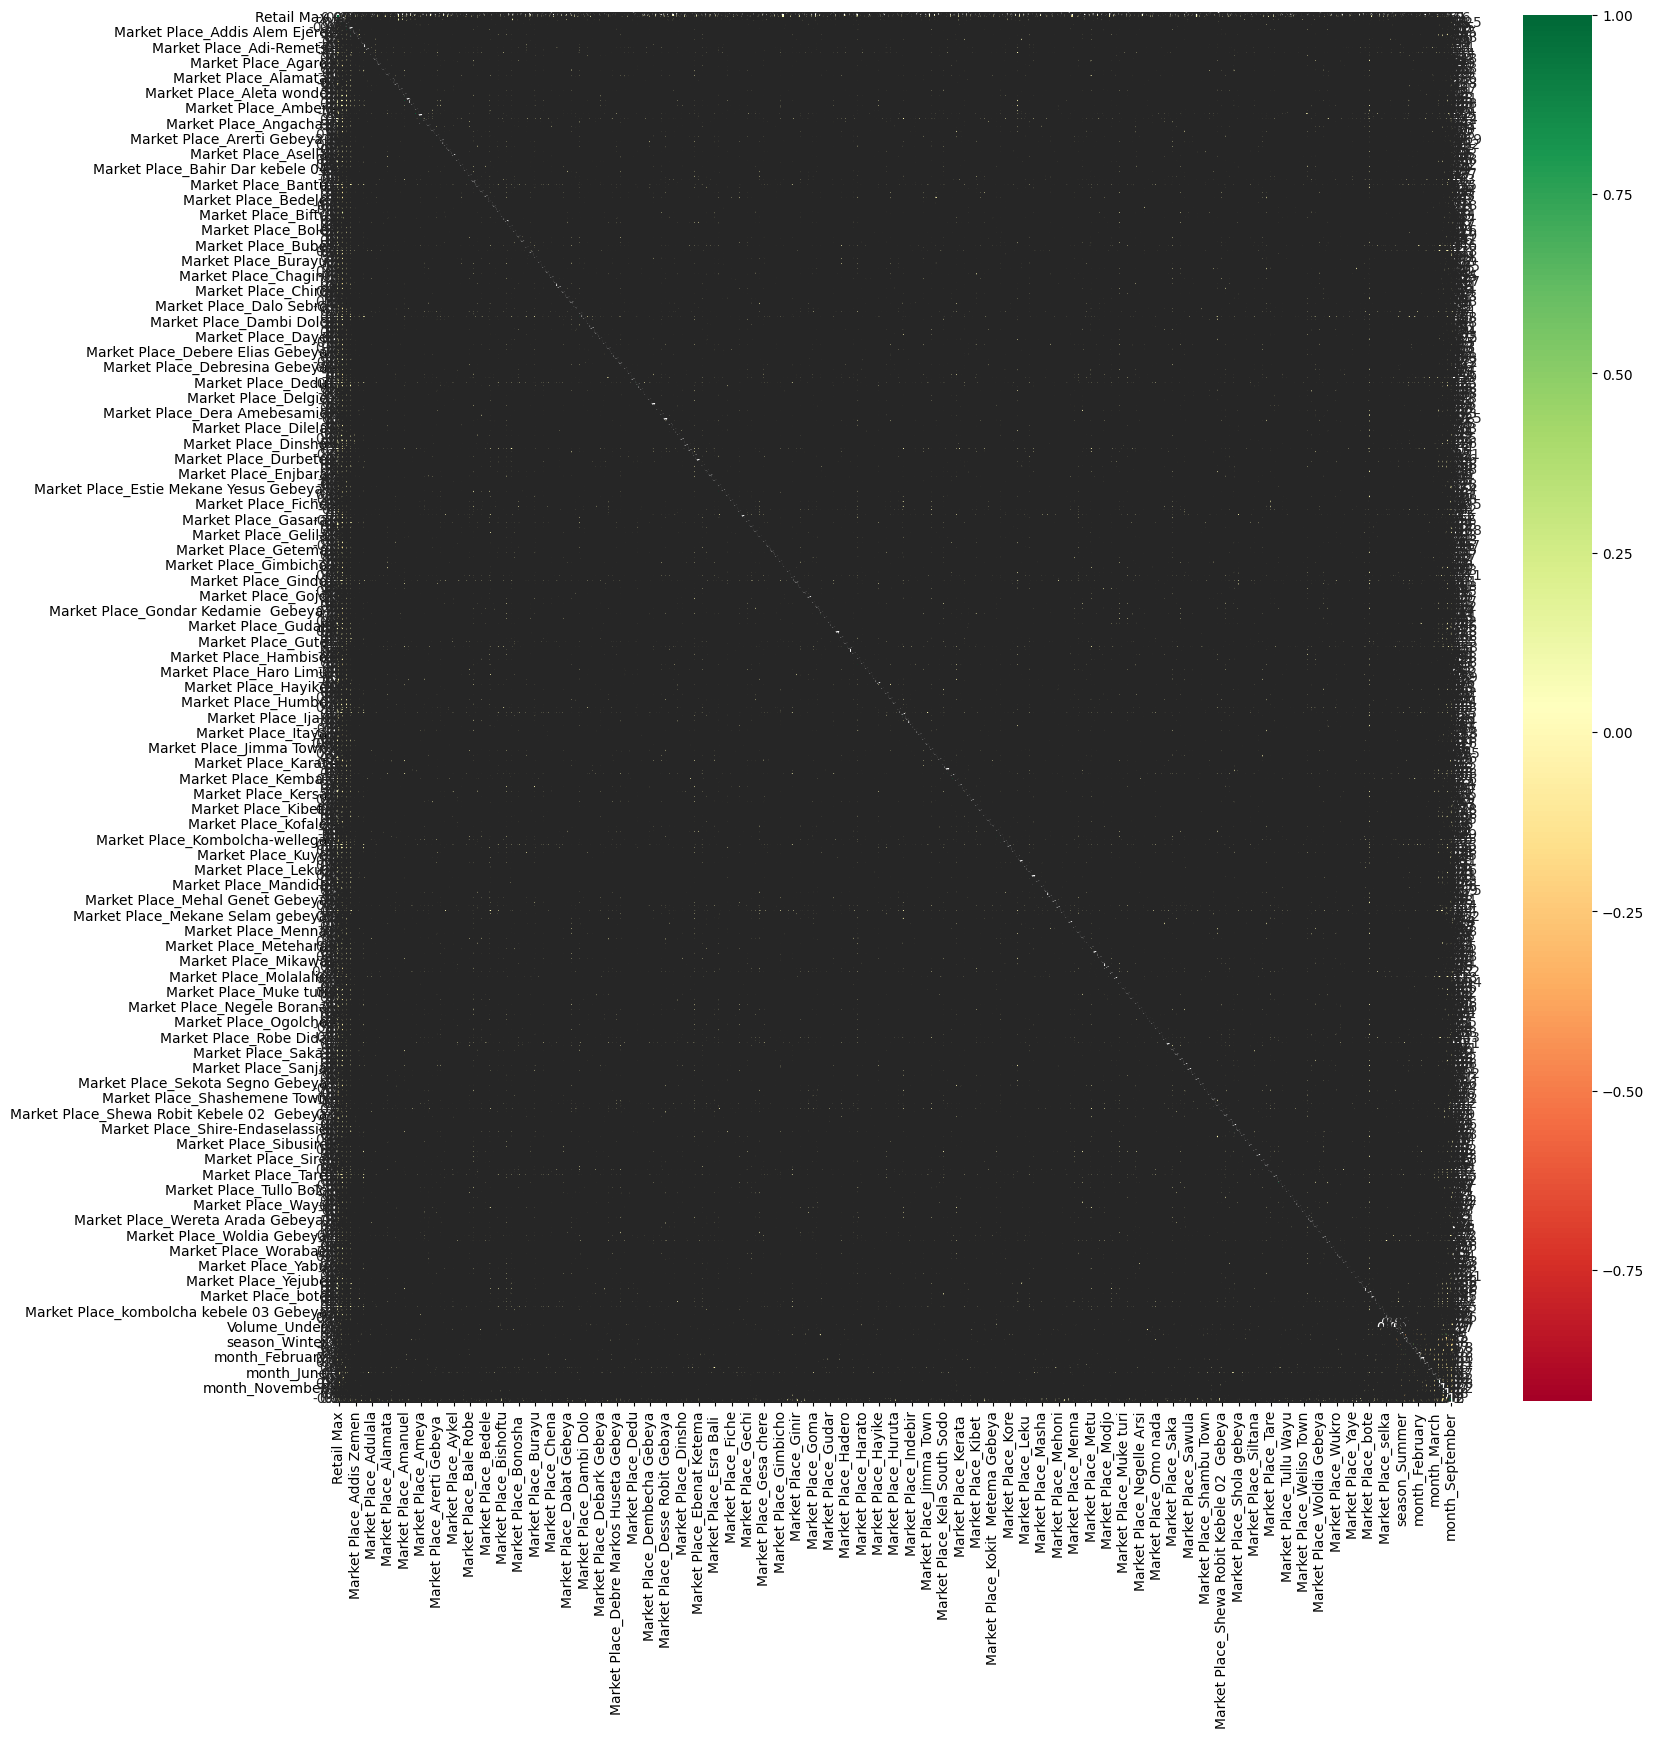

In [73]:
#
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [74]:
!pip install scikit-learn


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, labels, test_size=0.2, random_state=2)

In [77]:
len(Xtrain)# 80 percent of 934 data == 747 and 20 percent 187

17144

In [78]:
len(Ytrain)

17144

In [79]:
len(Xtest)

4287

In [80]:
len(Ytest)

4287

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
model = LinearRegression()

In [83]:
model.fit(Xtrain, Ytrain)

LinearRegression()

In [84]:
ypred = model.predict(Xtest)
ypred

array([4330.49544439, 4491.62129497, 4364.74398108, ..., 4225.83517398,
       4206.17892398, 4388.33517398])

In [85]:
Ytest

10262    4700
12401    4150
17841    5000
903      3120
3901     3500
         ... 
12019    5000
21618    6100
964      3100
7940     4200
4446     3850
Name: Retail Max, Length: 4287, dtype: int64

In [86]:
model.score(Xtrain,Ytrain)

0.03139471228171564

In [87]:
model.score(Xtest,Ytest)

0.033921888466893924

C:\Users\user\AppData\Local\Temp\ipykernel_5032\2343581898.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ytest-ypred)


<IPython.core.display.Javascript object>

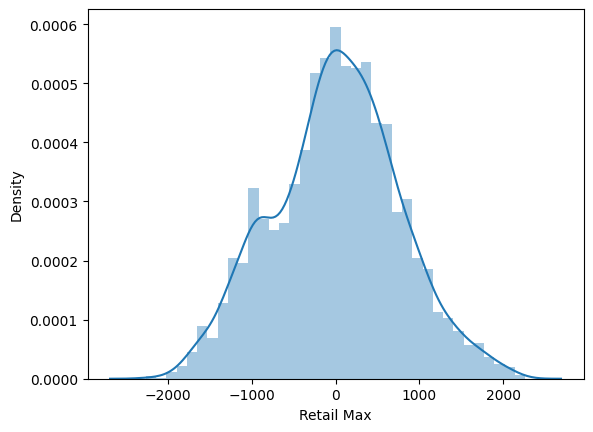

In [88]:
sns.distplot(Ytest-ypred)
plt.show()

In [89]:
metrics.r2_score(Ytest,ypred)

<IPython.core.display.Javascript object>

0.033921888466893924